# ShopEasy Final Project AI & ML 2023


### Importing Libraries & Reading Data


In [2]:
#Importing Libraries 

import numpy as np
import pandas as pd
from pandas.plotting import table
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

#Reading Data Set
path = './shopEasy.csv'
df = pd.read_csv(path)

## **EDA & Data Pre-Processing**

Here we will visualize the data, take into account important values and clean the dataset from irrelevant data

### **Vizualising and Understaning Data Structure & Values**

In [3]:
df.head()

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,...,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,...,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,...,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,...,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


##### Dataset features


• personId: Unique identifier for each user on the platform 

• accountTotal: Total amount spent by the user on ShopEasy since their registration 

• frequencyIndex: Reflects how frequently the user shops, with 1 being very frequent and values less than 1 being less frequent 

• itemCosts: Total costs of items purchased by the user 

• singleItemCosts: Costs of items that the user bought in a single purchase without opting for installments 

• multipleItemCosts: Costs of items that the user decided to buy in installments

• emergencyFunds: Amount that the user decided to keep as a backup in their ShopEasy wallet for faster checkout or emergency purchases

• itemBuyFrequency: Frequency with which the user makes purchases 

• singleItemBuyFrequency: How often the user makes single purchases without opting for installments 

• multipleItemBuyFrequency: How often the user opts for installment-based purchases 

• emergencyUseFrequency: How frequently the user taps into their emergency funds 

• emergencyCount: Number of times the user has used their emergency funds 

• itemCount: Total number of individual items purchased by the user 

• maxSpendLimit: The maximum amount the user can spend in a single purchase, set by ShopEasy based on user's buying behavior and loyalty

• monthlyPaid: Total amount paid by the user every month 

• leastAmountPaid: The least amount paid by the user in a single transaction 

• paymentCompletionRate: Percentage of purchases where the user has paid the full amount 

• accountLifespan: Duration for which the user has been registered on ShopEasy 

• location: User's city or region 

• accountType: The type of account held by the user. Regular for most users, Premium for those who have subscribed to ShopEasy premium services, and Student for users who have registered with a student ID 

• webUsage: A metric (0-100) indicating the frequency with which the user shops on ShopEasy via web browsers. A higher number indicates more frequent web usage

##### Type of data in each column

In [4]:
df.dtypes

personId                     object
accountTotal                float64
frequencyIndex              float64
itemCosts                   float64
singleItemCosts             float64
multipleItemCosts           float64
emergencyFunds              float64
itemBuyFrequency            float64
singleItemBuyFrequency      float64
multipleItemBuyFrequency    float64
emergencyUseFrequency       float64
emergencyCount                int64
itemCount                     int64
maxSpendLimit               float64
monthlyPaid                 float64
leastAmountPaid             float64
paymentCompletionRate       float64
accountLifespan               int64
location                     object
accountType                  object
webUsage                      int64
dtype: object

#### Cecking Data Integrity

##### Cecking Missing Values & Vizualising the %

In [5]:
# Calculate missing values
missing_values = df.isnull().sum()

# Calculate total values (missing + non-missing)
total_values = df.count() + missing_values

# Calculate percentage of missing values and format with percentage sign
percentage_missing = (missing_values / total_values * 100).apply(lambda x: f'{x:.2f}%')

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Total Values': total_values,
    'Percentage Missing': percentage_missing
})

# Print the summary
print("Summary:")
print(summary_df)


Summary:
                          Missing Values  Total Values Percentage Missing
personId                               0          8950              0.00%
accountTotal                           0          8950              0.00%
frequencyIndex                         0          8950              0.00%
itemCosts                              0          8950              0.00%
singleItemCosts                        0          8950              0.00%
multipleItemCosts                      0          8950              0.00%
emergencyFunds                         0          8950              0.00%
itemBuyFrequency                       0          8950              0.00%
singleItemBuyFrequency                 0          8950              0.00%
multipleItemBuyFrequency               0          8950              0.00%
emergencyUseFrequency                  0          8950              0.00%
emergencyCount                         0          8950              0.00%
itemCount                    


**Observations:**
- **Overall Data Completeness:** Most columns have a very low percentage of missing values or none at all, indicating that the dataset is largely complete.
- **Columns with Missing Data:**
  - **`maxSpendLimit`:** Only 1 missing value, which represents just 0.01% of the total. This is a very small percentage and might not impact overall analyses significantly.
  - **`leastAmountPaid`:** This column has 313 missing values, which is 3.50% of the total. While higher than the other percentage, this may not have such an impact  related to payment behavior and financial assessments. 


##### Checking for Duplicates

In [6]:
duplicates = df.duplicated().sum()
duplicates

0

##### Dropping Unecesary Values & Columns

1. **Dropping a Column**: We will remove the column 'personId' from the DataFrame because it is a primary key and irrelevant for future analysis.
2. **Dropping Rows with Missing Values**: All rows that have any missing values across the DataFrame (after 'personId' has been dropped) will be removed.
3. Created a "New" data frame with dropped values `ndf`


In [7]:
ndf = df.drop(columns='personId')

# Drop rows with missing 'leastAmountPaid' and 'maxSpendLimit' values
ndf = ndf.dropna()

#### Re-Checking Missing Values for `ndf`

In [8]:
print(ndf.isnull().sum())

accountTotal                0
frequencyIndex              0
itemCosts                   0
singleItemCosts             0
multipleItemCosts           0
emergencyFunds              0
itemBuyFrequency            0
singleItemBuyFrequency      0
multipleItemBuyFrequency    0
emergencyUseFrequency       0
emergencyCount              0
itemCount                   0
maxSpendLimit               0
monthlyPaid                 0
leastAmountPaid             0
paymentCompletionRate       0
accountLifespan             0
location                    0
accountType                 0
webUsage                    0
dtype: int64


New DataFrame Data Cleaning Completed

#### Describing the New DataFrame 

In [9]:
ndf.describe().T

,count,mean,std,min,25%,50%,75%,max
accountTotal,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
frequencyIndex,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
itemCosts,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
singleItemCosts,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
multipleItemCosts,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
emergencyFunds,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
itemBuyFrequency,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
singleItemBuyFrequency,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
multipleItemBuyFrequency,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
emergencyUseFrequency,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


**Observations:**
- The summary helps in quickly assessing the distribution and range of values in each column.
- Discrepancies such as the `leastAmountPaid` having a maximum value greater than the `accountTotal` suggest potential errors or outliers in the data, which requires further investigation to ensure accuracy in the data analysis.

### **Univariate Analysis**


##### Distribution Graph
Comprehensive look at the distribution of a single variable within a dataframe.


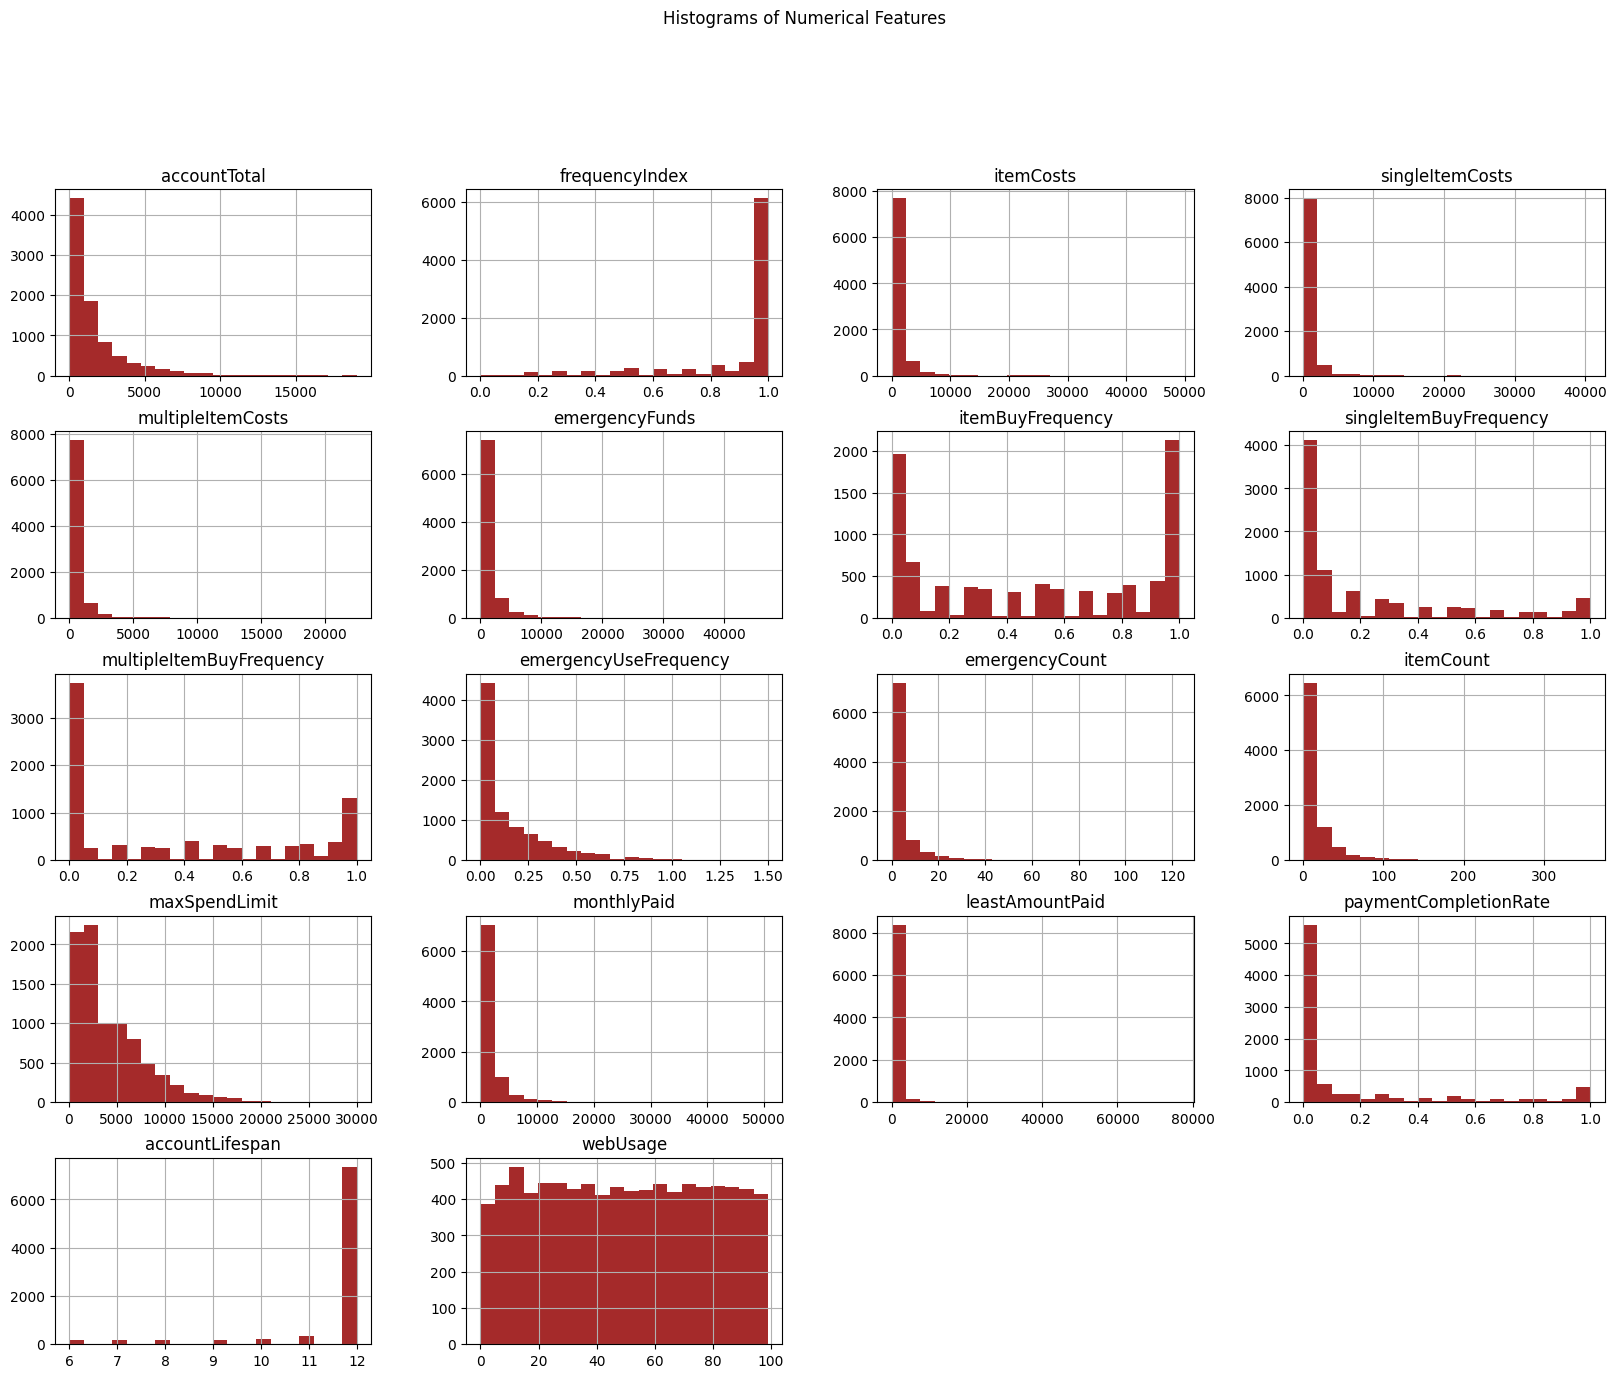

In [10]:
# Distribution of numerical features
numerical_features = ndf.select_dtypes(include=['float64', 'int64']).columns
ndf[numerical_features].hist(bins=20, figsize=(20, 15), color='brown')
plt.suptitle('Histograms of Numerical Features', y=1)
plt.savefig('images/histograms.png')
plt.show()

**Skewed Distributions:**
  - Right skew indicates a high concentration of values at the lower end, suggesting possible outliers on the higher end.
  - Left skew indicates a high concentration of values at the higher end, suggesting possible outliers on the lower end.
  

**Observations from the Data:**

- **Right-Skewed Distributions**:
  - accountTotal
  - itemCosts
  - maxSpendLimit

- **Left-Skewed Distributions**:
  - frequencyIndex
  - accountLifespan

- **Bimodal Distribution**:
  - itemBuyFrequency

- **Uniform Distribution**:
  - webusage


##### Box Plots
To identify and analyze outliers, we will utilize boxplots.

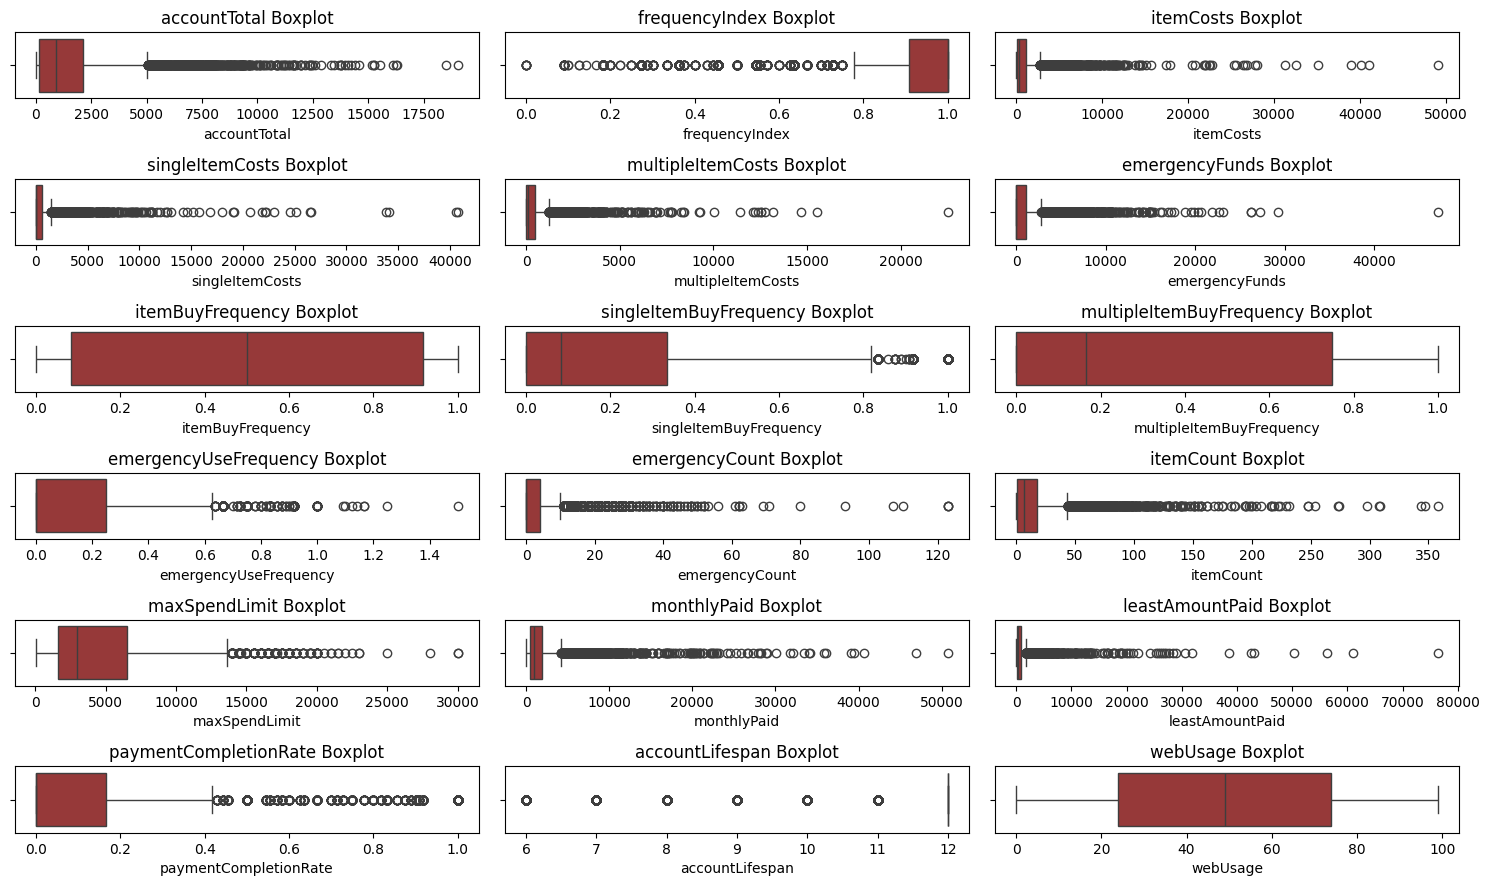

In [11]:
# Visualize the boxplot of each variable.
# Define the figure size
fig, axs = plt.subplots(7, 3, figsize=(15, 10))
axs = axs.flatten()

# Loop through each column and create a boxplot
for idx, col in enumerate(ndf.describe().columns):
    sns.boxplot(x=ndf[col], ax=axs[idx], color='brown')
    axs[idx].set_title(f'{col} Boxplot')

# Remove any unused subplots
for idx in range(len(ndf.describe().columns), len(axs)):
    fig.delaxes(axs[idx])

plt.savefig('images/boxplots.png')
plt.tight_layout()
plt.show()

**Observations from Box Plots:**

- **High Variation**:
  - Many box plots exhibit a significant number of outliers.
  - These outliers indicate substantial variation within certain features.

- **Next Steps**:
  - Before going deeper into outlier analysis, we will first select the most appropriate features for clustering.

### **Bivariate Analysis**

- **Objective**: Examine relationships between pairs of variables with similar values from the boxplots.

- **Pairs Analyzed**:
  - **itemCosts and singleItemCosts**
  - **itemBuyFrequency and multipleItemBuyFrequency**

- **Outliers**:
  - **leastAmountPaid**: Outliers reach values around 80,000, significantly higher than the highest values in monthlyPaid or accountTotal.
  - **monthlyPaid**: The attribute's description, "Total amount paid by the user every month," is vague. It is unclear whether this refers to a fixed amount or an average.

- **Anomalies**:
  - **leastAmountPaid vs. accountTotal**: leastAmountPaid has higher values than accountTotal, which is illogical. The least amount paid in a single transaction should not exceed the total amount spent since registration.

- **Next Steps**:
  - Further analysis in multivariate analysis to investigate any missed relationships or anomalies.


#### **ScatterPlot & Correlation**

##### `itemBuyFrequency ` vs. `multipleItemBuyFrequency `

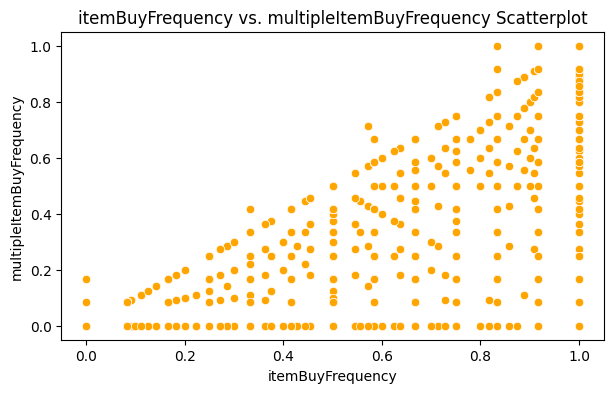

The correlation between itemBuyFrequency and multipleItemBuyFrequency is 0.86


In [12]:
fig = plt.figure(figsize=(7,4))
sns.scatterplot(x=ndf.itemBuyFrequency, y=ndf.multipleItemBuyFrequency, color='orange')
plt.title('itemBuyFrequency vs. multipleItemBuyFrequency Scatterplot')
plt.savefig('images/scatteritemBuyFrequencyvsmultipleItemBuyFrequency.png')
plt.show()

correlation = ndf['itemBuyFrequency'].corr(ndf['multipleItemBuyFrequency'])
print(f'The correlation between itemBuyFrequency and multipleItemBuyFrequency is {correlation:.2f}')

**Analysis of Relationship Between itemBuyFrequency and multipleItemBuyFrequency**

We observe a strong positive relationship between the two variables. This is expected as their definitions are closely related:
- **itemBuyFrequency**: "Frequency of items purchased by the user."
- **multipleItemBuyFrequency**: "Frequency of items bought in multiple installments by the user."

To quantify this relationship, we calculated their correlation.

- **Correlation Result**: The correlation is very strong (0.86).
  - **Interpretation**: This high correlation suggests that users frequently opt for multiple installments, resulting in a close alignment between the overall buying frequency and the frequency of installment purchases.
  - **Alternative Explanation**: It is also possible that purchases made in installments tend to be frequent, thereby contributing to the strong correlation.

**Key Points:**
- The scatter plot visually confirms the strong positive relationship.
- The correlation coefficient quantifies this relationship, indicating a value of 0.86.
- Users often choose multiple installments, or frequent installment purchases align closely with the overall buying frequency, leading to this high correlation.

---

##### `itemCosts` vs. `singleItemCosts`

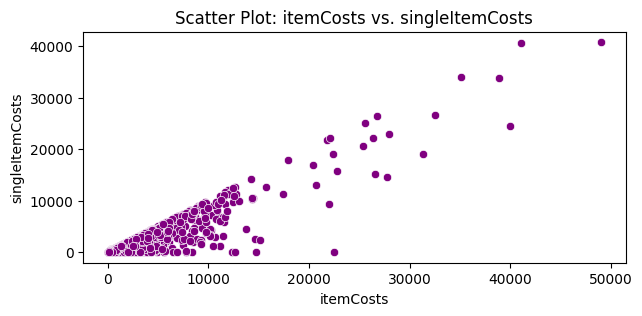

The correlation between itemCosts and singleItemCosts is 0.92


In [13]:
# Create a scatter plot with a defined figure size
plt.figure(figsize=(7, 3))

# Plot the data
sns.scatterplot(x=ndf['itemCosts'], y=ndf['singleItemCosts'], color='purple')
plt.title('Scatter Plot: itemCosts vs. singleItemCosts')
plt.savefig('images/scatteritemCostsvssingleItemCosts.png')

plt.show()

# Calculate and display the correlation
correlation = ndf['itemCosts'].corr(ndf['singleItemCosts'])
print(f'The correlation between itemCosts and singleItemCosts is {correlation:.2f}')

**Analysis of Relationship Between itemCosts and singleItemCosts**

We observe a strong positive relationship between the two variables. This is expected as their definitions are closely related:
- **itemCosts**: "Total costs of items purchased by the user."
- **singleItemCosts**: "Costs of items that the user bought in a single purchase without opting for installments."

To quantify this relationship, we calculated their correlation.

- **Correlation Result**: The correlation is very strong (close to 1).
  - **Interpretation**: This high correlation suggests that most users prefer single purchases without multiple installments, leading to a high overlap between total costs and single-item costs.
  - **Alternative Explanation**: It is also possible that single purchases tend to have higher values compared to multiple installment purchases, contributing to the strong correlation.

**Key Points:**
- The scatter plot visually confirms the strong positive relationship.
- The correlation coefficient quantifies this relationship, indicating a value close to 1.
- Users typically opt for single purchases without installments or the value of single purchases is higher, leading to this high correlation.
  
---

##### `itemCosts` vs. `multipleItemCosts`

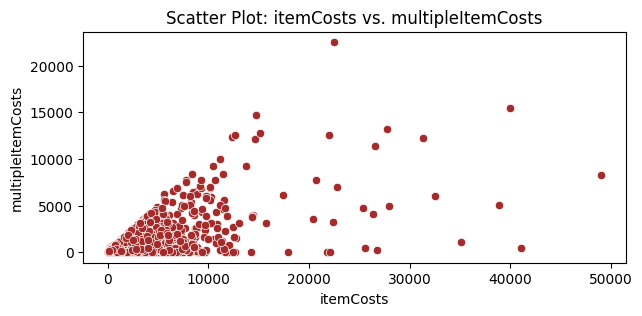

The correlation between itemCosts and multipleItemCosts is 0.68


In [14]:
# Create a scatter plot with a defined figure size
plt.figure(figsize=(7, 3))

# Plot the data
sns.scatterplot(x=ndf['itemCosts'], y=ndf['multipleItemCosts'], color='brown')
plt.title('Scatter Plot: itemCosts vs. multipleItemCosts')
plt.savefig('images/scatteritemCostsvsmultipleItemCosts.png')

plt.show()
correlation = ndf['itemCosts'].corr(ndf['multipleItemCosts'])
print(f'The correlation between itemCosts and multipleItemCosts is {correlation:.2f}')

We also check the correlation between `itemCosts` and `multipleItemCosts` and see it is **moderately strong at 0.68**, indicating a significant relationship between total costs and costs of items bought in multiple installments.

---

##### Anomaly between the two relationships

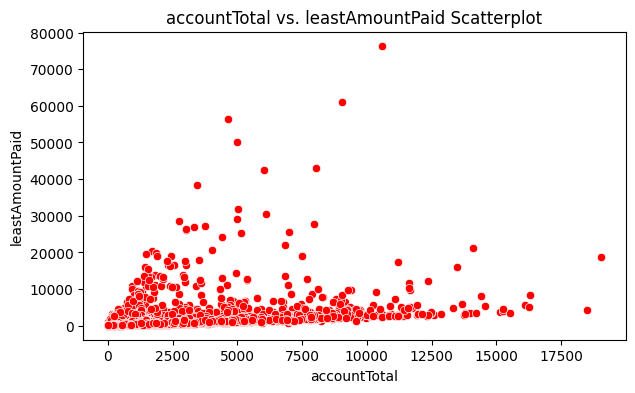

The correlation between accountTotal and leastAmountPaid is 0.40


In [15]:
fig = plt.figure(figsize=(7,4))
sns.scatterplot(x=ndf.accountTotal, y=ndf.leastAmountPaid, color='red')
plt.title('accountTotal vs. leastAmountPaid Scatterplot')
plt.savefig('images/scatteraccountTotalvsleastAmountPaid.png')
plt.show()

correlation = ndf['accountTotal'].corr(ndf['leastAmountPaid'])
print(f'The correlation between accountTotal and leastAmountPaid is {correlation:.2f}')

**Analysis of Relationship Between accountTotal and leastAmountPaid**

We observe a moderate positive relationship between the two variables, as their definitions are somewhat related:
- **accountTotal**: "Total amount in the account."
- **leastAmountPaid**: "Least amount paid on the account."

To quantify this relationship, we calculated their correlation.

- **Correlation Result**: The correlation is moderate (0.40).
  - **Interpretation**: This correlation suggests that while there is a relationship between the total amount in the account and the least amount paid, it is not very strong. Users with higher account totals do not always pay higher amounts, but there is still a noticeable tendency.
  - **Alternative Explanation**: It is possible that higher account totals might be associated with higher payments to some extent, thereby contributing to the moderate correlation.

**Key Points:**
- The scatter plot visually shows the moderate positive relationship.
- The correlation coefficient quantifies this relationship, indicating a value of 0.40.
- There is a moderate alignment between the total amount in the account and the least amount paid, leading to this moderate correlation.

---

**Integrity Issue in Account Data**

As can be seen, **`numerous users have values for leastAmountPaid that are higher than the values for accountTotal, which should not be possible`**. This discrepancy suggests an inconsistency in the data that needs to be addressed to ensure accurate analysis.

---

#### **Using Categorical Values**

We'll use **`location`** and **`accountType`** to see if there is a predominal category.

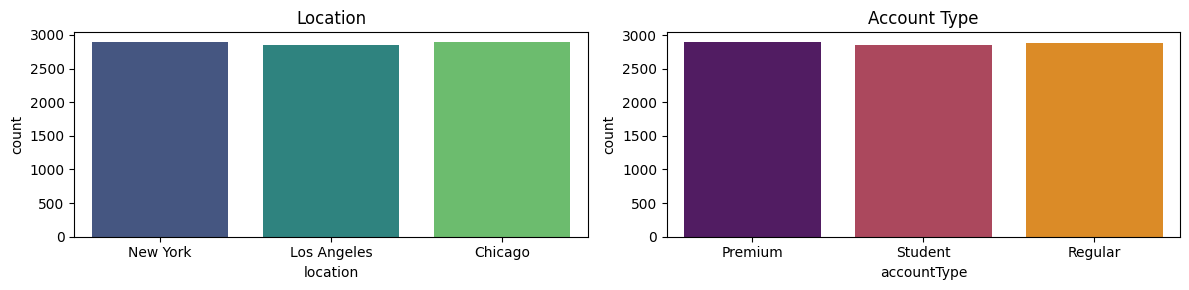

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Plot the countplot for location
sns.countplot(data=ndf, x="location", ax=axes[0], palette='viridis', hue='location')
axes[0].set_title("Location")

# Plot the countplot for accountType
sns.countplot(data=ndf, x="accountType", hue='accountType', ax=axes[1], palette='inferno')
axes[1].set_title("Account Type")

plt.tight_layout()
plt.savefig('images/CatValues.png')
plt.show()

Both categories seem to have equal distribution

---

#### **KDE(Kernel Density Estimate)**

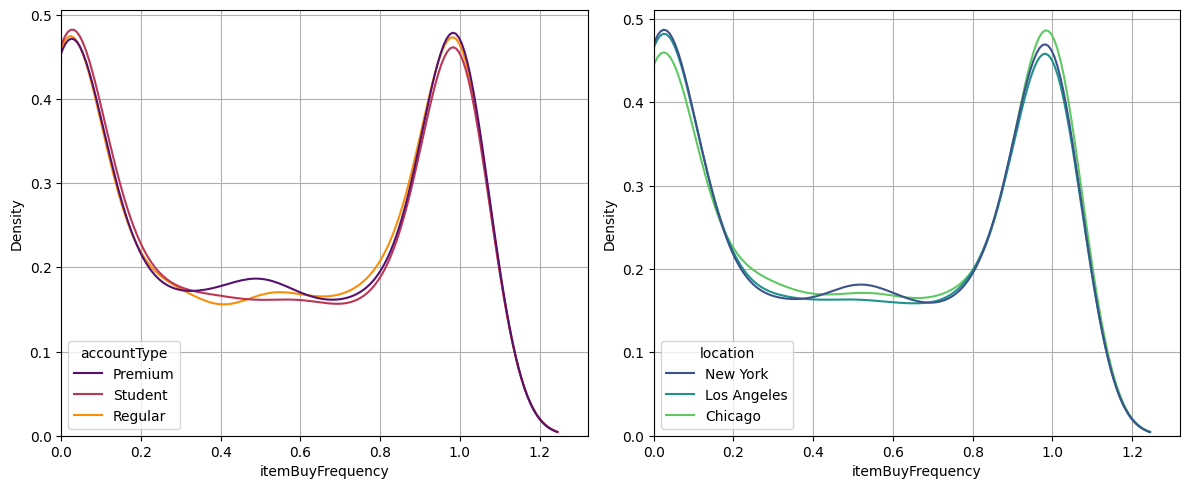

In [17]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the KDE plot for itemBuyFrequency by accountType on the first axis
sns.kdeplot(data=ndf, x="itemBuyFrequency", hue='accountType', multiple='layer', ax=ax[0], palette="inferno")
ax[0].set_xlim(0, None)
ax[0].grid()

# Plot the KDE plot for itemBuyFrequency by location on the second axis
sns.kdeplot(data=ndf, x="itemBuyFrequency", hue='location', multiple='layer', ax=ax[1], palette="viridis")
ax[1].set_xlim(0, None)
ax[1].grid()

plt.tight_layout()
plt.savefig('images/KDE.png')
plt.show()


The KDE plots above indicate that the distribution of itemBuyFrequency is similar across different account types and locations. This suggests that neither accountType nor location significantly affects the distribution of other features.

Based on this observation, we determine that the location feature may not be relevant for understanding customer buying habits and behavior. In an e-commerce context, where most transactions occur online, the customer's physical location is less significant.

---

#### **PariPlot with `accountType`**
We will use a pairplot to investigate the potential correlation between accountType and other key features that might influence customer buying habits and behavior.

Because we want to find personalized shopping experience for its users we will try to focus mainly on finding a correlation with the account types

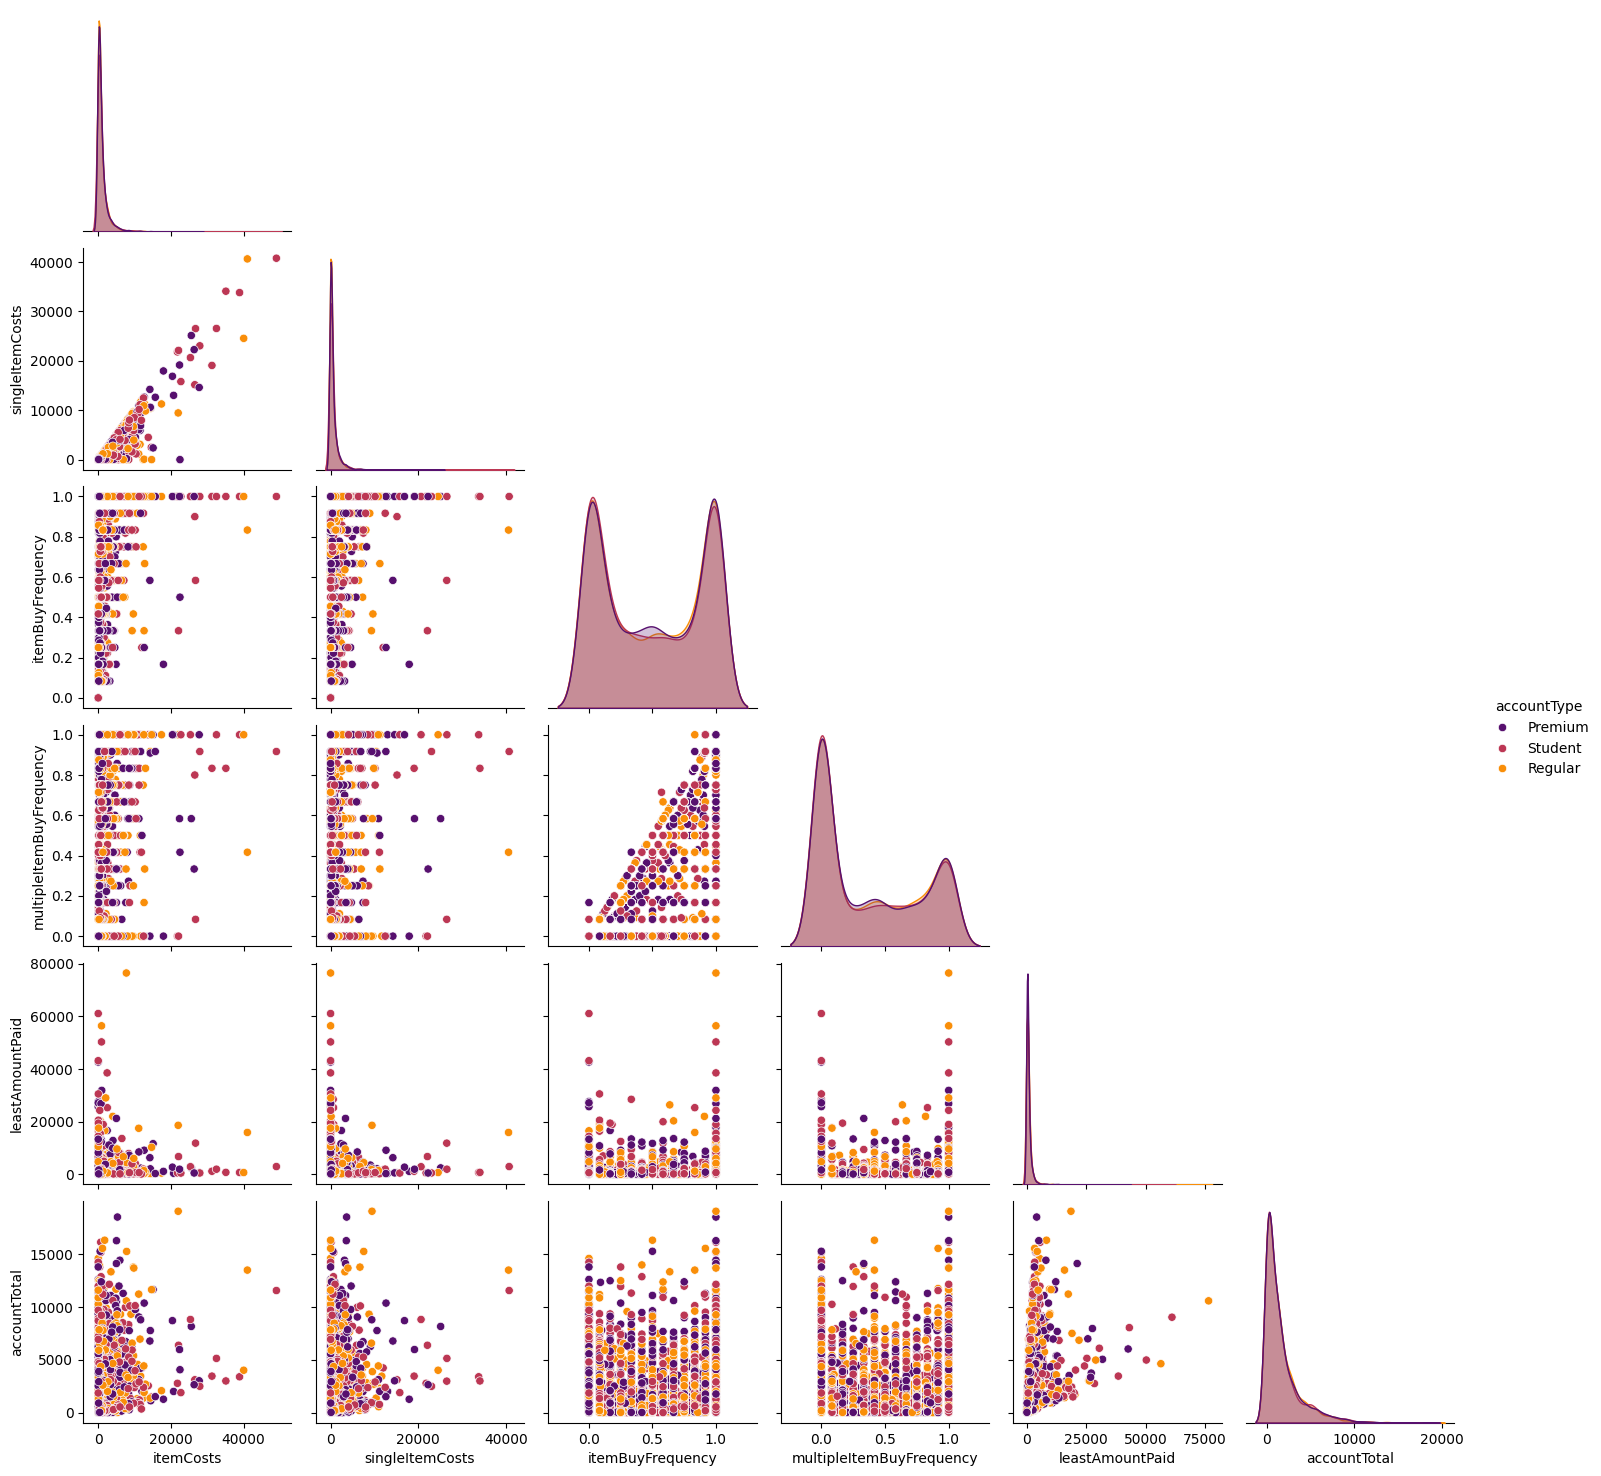

In [18]:
# Create a pairplot to explore relationships between accountType and other significant features
sns.pairplot(data=ndf, hue='accountType', vars=['itemCosts', 'singleItemCosts', 'itemBuyFrequency', 'multipleItemBuyFrequency', 'leastAmountPaid', 'accountTotal'], corner=True, palette="inferno")
plt.savefig('images/PairPlot.png')
plt.show()

Using the Pairplot we cannot get a clear visualization of any coorelation between `accountType` and any other variable

### **Label Encoding**

**`Encoding for accountType`**

- **Rationale**:
  - We apply label encoding to accountType because it can be considered ordinal, where the order of categories is meaningful.

- **Ordering**:
  - **Premium** `0`: Pays the most. 
  - **Regular** `1`: Pays a standard amount. 
  - **Student** `2`: Pays the least due to discounts. 

This encoding reflects the hierarchy of payment amounts among different account types.

In [19]:
ndf = ndf.copy()

label_encoder = LabelEncoder()
transformed_column = label_encoder.fit_transform(ndf['accountType'])
ndf['accountType'] = transformed_column

ndf, df


(      accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
 0      1034.660626        0.833333    1308.11          1308.11   
 1       777.853474        0.666667       0.00             0.00   
 2        97.453056        0.818182     334.73           334.73   
 4        18.120946        0.500000      57.00            57.00   
 5       478.834962        1.000000    1060.99          1040.99   
 ...            ...             ...        ...              ...   
 8945   2901.999862        1.000000   11250.65         10165.88   
 8946     25.998310        0.454545     398.57           111.24   
 8947   1859.165344        1.000000       0.00             0.00   
 8948   2931.237524        1.000000     150.00           150.00   
 8949    905.771358        1.000000     116.15            36.15   
 
       multipleItemCosts  emergencyFunds  itemBuyFrequency  \
 0                  0.00      234.602843          0.500000   
 1                  0.00     1820.143378          0.000000   
 2      

**`Encoding for location`**

- **Data Type**:
  - Location values are nominal, meaning they have no inherent order.

- **Encoding Choice**:
  - We avoid label encoding to prevent implying any natural order.
  - Instead, we use dummy variables, where each category is represented by a binary vector.

This approach ensures that the encoding accurately reflects the nature of the location data.

In [20]:
ndflocs = pd.get_dummies(ndf, columns=['location'])
ndflocs

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,accountType,webUsage,location_Chicago,location_Los Angeles,location_New York
0,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,0.166667,...,1500.0,236.764555,207.007715,0.000000,6,0,60,False,False,True
1,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,0.500000,...,2000.0,89.741508,173.276205,0.000000,6,0,5,False,True,False
2,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,0.083333,...,2500.0,234.271939,117.297542,0.250000,12,2,21,False,False,True
4,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,1500.0,118.438703,54.138711,0.000000,6,0,59,False,False,True
5,478.834962,1.000000,1060.99,1040.99,20.00,0.000000,0.166667,0.083333,0.083333,0.000000,...,1300.0,1162.790308,208.559750,0.000000,12,0,56,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,2901.999862,1.000000,11250.65,10165.88,1084.77,0.000000,1.000000,1.000000,0.750000,0.000000,...,9500.0,6443.381719,691.328423,0.083333,12,2,59,True,False,False
8946,25.998310,0.454545,398.57,111.24,287.33,0.000000,0.333333,0.083333,0.250000,0.000000,...,2500.0,821.069037,132.906041,0.800000,12,0,17,False,False,True
8947,1859.165344,1.000000,0.00,0.00,0.00,1543.160715,0.000000,0.000000,0.000000,0.083333,...,3500.0,310.775643,659.586136,0.000000,12,2,54,False,True,False
8948,2931.237524,1.000000,150.00,150.00,0.00,1434.135353,0.083333,0.083333,0.000000,0.083333,...,3000.0,577.725789,1683.482088,0.000000,12,0,59,False,True,False


---

### **Correlation Heatmap**

Using this heatmap we'll visualize the correlation between all attributes, observing correlation that we might have missed.

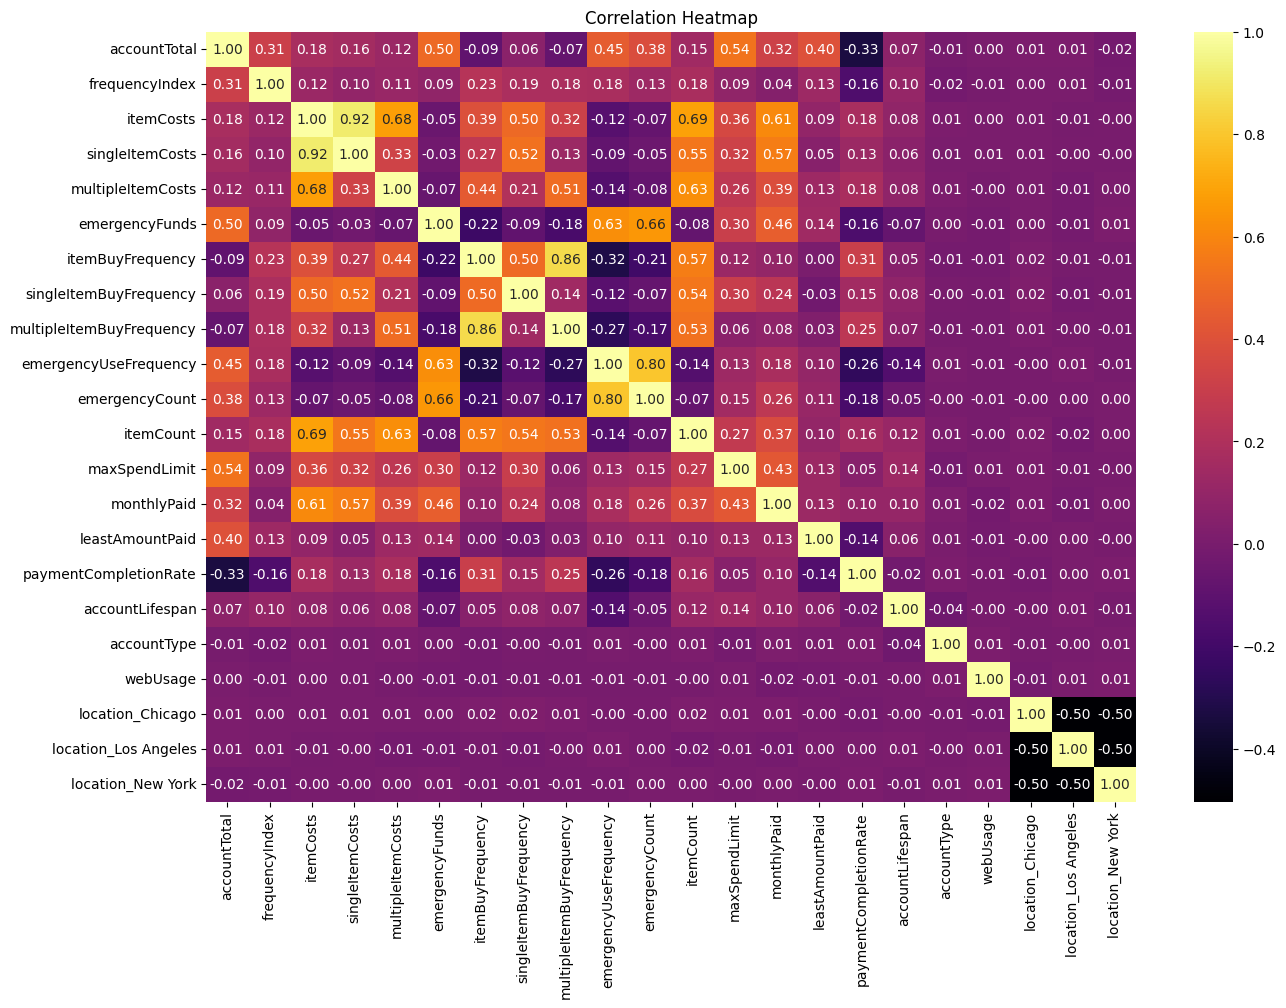

In [21]:
correlationmatrix = ndflocs.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlationmatrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('images/HeatMapFull.png')
plt.show()

**Correlation Heatmap Analysis**

- **Location**:
  - No correlation with other attributes.
  - Location is not relevant for our analysis as it doesn't affect customer behavior on the e-commerce website.
  - *Drop location feature.*

- **Account Type**:
  - Relevant to our analysis despite no correlation with other features in the heatmap.
  - *Keep accountType feature.*

- **Irrelevant or Redundant Features (*To Be Dropped*)**:
  - **accountTotal**:
    - Inconsistent values compared to itemCosts and monthlyPaid.
    - Possibly represents non-monetary value, different currency, or inaccurate data.
  - **leastAmountPaid**:
    - No correlation with other features.
    - Inconsistent values compared to monthlyPaid.
  - **monthlyPaid**:
    - Inconsistencies with itemCosts.
    - No additional insights over itemCosts.
  - **webUsage** and **frequencyIndex**:
    - Little to no correlation with other features.
    - Similar definitions to itemBuyFrequency, which is relevant.
  - **paymentCompletionRate**:
    - Lack of correlation with other features.
    - Provides no significant insights.
  - **maxSpendLimit**:
    - Inconsistencies with singleItemCosts.
    - Definition conflicts with actual values.
  - **singleItemBuyFrequency** and **multipleItemBuyFrequency**:
    - More specific versions of itemBuyFrequency.
    - Can be generalized by itemBuyFrequency.
  - **singleItemCosts** and **multipleItemCosts**:
    - More specific versions of itemCosts.
    - Can be generalized by itemCosts.
  - **emergencyUseFrequency**:
    - High correlation with emergencyCount.
    - Redundant feature.

### **Dropping Values**

Here we create a new variable Final Data Frame `fdf` in which we drop all the columns listed above

In [22]:
fdf= ndf.drop(['location', 'accountTotal', 'leastAmountPaid', 'monthlyPaid', 'webUsage', 'frequencyIndex', 'paymentCompletionRate', 'maxSpendLimit', 'itemBuyFrequency', 'itemCosts', 'emergencyUseFrequency'], axis = 'columns')
fdf

,singleItemCosts,multipleItemCosts,emergencyFunds,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyCount,itemCount,accountLifespan,accountType
0,1308.11,0.00,234.602843,0.500000,0.000000,1,8,6,0
1,0.00,0.00,1820.143378,0.000000,0.000000,8,0,6,0
2,334.73,0.00,19.551802,0.083333,0.000000,1,1,12,2
4,57.00,0.00,0.000000,0.166667,0.000000,0,1,6,0
5,1040.99,20.00,0.000000,0.083333,0.083333,0,4,12,0
...,...,...,...,...,...,...,...,...,...
8945,10165.88,1084.77,0.000000,1.000000,0.750000,0,274,12,2
8946,111.24,287.33,0.000000,0.083333,0.250000,0,4,12,0
8947,0.00,0.00,1543.160715,0.000000,0.000000,5,0,12,2
8948,150.00,0.00,1434.135353,0.083333,0.000000,3,3,12,0


### **Removing Outliers**

To address outliers, we will remove values that are more than 4 standard deviations from the mean. 
Below we identify and remove these outliers, and count how many are removed to ensure we don't lose too much data.

In [23]:
cleaned_df = fdf.copy()
original_row_count = len(fdf)
total_outliers_removed = 0

for column in fdf.columns:
    mean = np.mean(fdf[column])
    std = np.std(fdf[column])
    
    outlier_indices = cleaned_df[(np.abs((cleaned_df[column] - mean) / std) > 4)].index
    
    outliers_removed = len(outlier_indices)
    total_outliers_removed += outliers_removed
    
    cleaned_df = cleaned_df.drop(index=outlier_indices)

final_row_count = len(cleaned_df)
print(f"Original number of rows: {original_row_count}")
print(f"Final number of rows: {final_row_count}")
print(f"Total outliers removed: {total_outliers_removed}")

cleaned_df

Original number of rows: 8636
Final number of rows: 8130
Total outliers removed: 506


,singleItemCosts,multipleItemCosts,emergencyFunds,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyCount,itemCount,accountLifespan,accountType
2,334.73,0.00,19.551802,0.083333,0.000000,1,1,12,2
5,1040.99,20.00,0.000000,0.083333,0.083333,0,4,12,0
6,2565.24,94.97,0.000000,0.416667,0.416667,0,13,12,0
7,907.37,0.00,0.000000,1.000000,0.000000,0,12,12,1
10,0.00,177.76,0.000000,0.000000,0.777778,0,8,9,2
...,...,...,...,...,...,...,...,...,...
8944,0.00,42.56,0.000000,0.000000,0.250000,0,3,12,1
8946,111.24,287.33,0.000000,0.083333,0.250000,0,4,12,0
8947,0.00,0.00,1543.160715,0.000000,0.000000,5,0,12,2
8948,150.00,0.00,1434.135353,0.083333,0.000000,3,3,12,0


The number of rows removed is 536, which is relatively small and can be considered negligible. Therefore, we proceed with the removal process. 

### **Data Scaling**

Since the attribute values have significantly different ranges, we scale the data as a general practice.

In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df)
scaled_df = pd.DataFrame(scaled_data, columns=cleaned_df.columns)
scaled_df

,singleItemCosts,multipleItemCosts,emergencyFunds,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyCount,itemCount,accountLifespan,accountType
0,-0.154868,-0.608409,-0.533464,-0.391982,-0.917736,-0.371997,-0.680930,0.334174,1.233336
1,0.611179,-0.573866,-0.546398,-0.391982,-0.707019,-0.577511,-0.511524,0.334174,-1.219158
2,2.264460,-0.444383,-0.546398,0.746239,0.135857,-0.577511,-0.003306,0.334174,-1.219158
3,0.466248,-0.608409,-0.546398,2.738119,-0.917736,-0.577511,-0.059775,0.334174,0.007089
4,-0.517933,-0.301394,-0.546398,-0.676535,1.048970,-0.577511,-0.285649,-2.537746,1.233336
...,...,...,...,...,...,...,...,...,...
8125,-0.517933,-0.534902,-0.546398,-0.676535,-0.285581,-0.577511,-0.567993,0.334174,0.007089
8126,-0.397277,-0.112152,-0.546398,-0.391982,-0.285581,-0.577511,-0.511524,0.334174,-1.219158
8127,-0.517933,-0.608409,0.474473,-0.676535,-0.917736,0.450057,-0.737399,0.334174,1.233336
8128,-0.355235,-0.608409,0.402348,-0.391982,-0.917736,0.039030,-0.567993,0.334174,-1.219158


### **Correlation Heatmap for Cleaned & Scaled Data Frame**

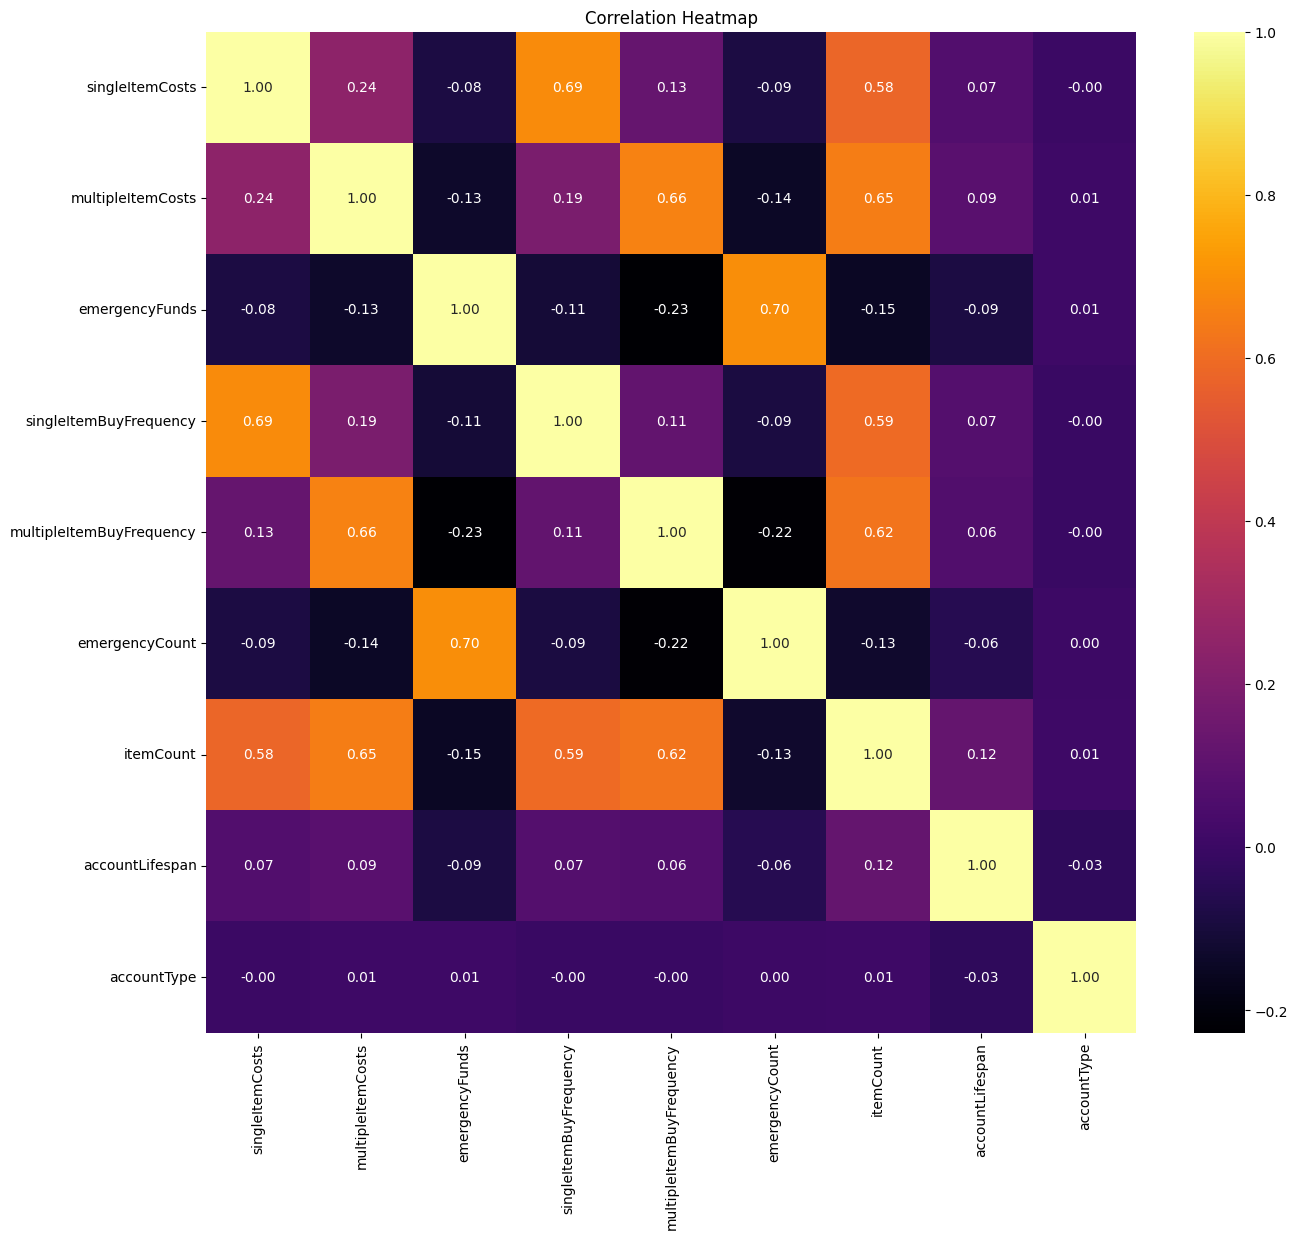

In [25]:
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('images/HeatMapScaled.png')
plt.show()

## **ML MODELS**

#### Description


***Why this is a Clustering Problem***

- **Data Characteristics**:
  - The dataset includes both numerical and categorical data, ideal for segmentation and clustering.

- **Not Regression**:
  - Regression predicts continuous outcomes, which is not the focus here.

- **Not Classification**:
  - Classification involves supervised learning with predefined categorical outcomes. Our goal is to uncover clusters, not use predefined ones.

- **Clustering Approach**:
  - Clustering is used in unsupervised learning to discover patterns and group customers into clusters without predefined outcomes.

The objective is to identify natural groupings within the data to enhance the user experience through personalized recommendations.

### **K-Means ++**

#### **Description** 



***What is K-means++?***

K-means++ is an enhanced initialization method for the K-means clustering algorithm. Instead of randomly selecting initial centroids like the standard K-means algorithm, K-means++ carefully selects initial centroids to be more spread out. Here’s how we will do it:

1. **First Centroid:** We will select the first centroid randomly from the data points.
2. **Subsequent Centroids:** For each subsequent centroid, we will select a data point from the remaining data points with a probability proportional to its squared distance from the nearest existing centroid.
3. **Repeat:** We will continue this process until we have chosen \( k \) centroids.

***Why is K-means++ Good for This Problem?***

- **Better Initialization:** K-means++ ensures that our initial centroids are spread out, reducing the chances of poor initialization that could lead to suboptimal clustering results.
- **Faster Convergence:** With better initial centroids, K-means++ will often converge faster than standard K-means, reducing the number of iterations required.
- **Improved Clustering Quality:** By starting with well-separated centroids, K-means++ will increase the likelihood of finding clusters that better represent the inherent structure of the data.

For our clustering analysis on customer purchasing behavior, K-means++ will be particularly beneficial because:
- It will help us identify distinct customer segments more accurately.
- It will reduce the variability in clustering results, leading to more consistent and reliable insights.
- It will enhance the performance and efficiency of the clustering process, making it suitable for large datasets.

Overall, K-means++ will be a robust choice for our clustering tasks, providing a solid foundation for segmenting customers effectively and deriving meaningful business insights.

#### **Choosing the Optimal Number of Clusters**

##### **Elbow Method**

**Purpose**: To determine the ideal number of clusters for K-means clustering.

**Inertia**: Measures how close values in a cluster are to their centroid (within-cluster sum of squares). Inertia decreases as the number of clusters increases.

**Procedure**: 
     - Run K-means with different numbers of clusters (k).
     - Plot inertia (y-axis) against the number of clusters (x-axis).
     - The "elbow point," where inertia starts to decrease more slowly, indicates the optimal number of clusters. Beyond this point, adding more clusters offers diminishing returns.

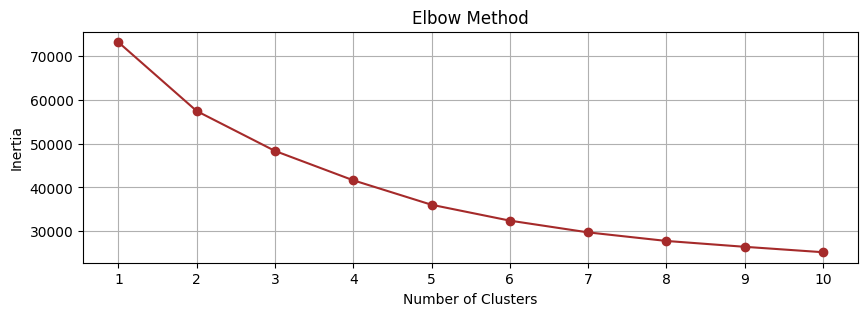

In [26]:
n_clusters_vector = range(1, 11)
inertia = []
for i in n_clusters_vector:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 3))
plt.plot(n_clusters_vector, inertia, marker='o', color='brown')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(n_clusters_vector)
plt.grid(True)
plt.savefig('images/Elbow_Clusters.png')
plt.show()

This method suggest a cluster number of 3 or 4 given the graph

##### **Silhouette Score**

   - **Usage**: We will also use the Silhouette score to determine the appropriate number of clusters, taking into account the graph.
   - **Function**: Measures how similar an object is to its own cluster compared to other clusters.
   - **Importance**: Helps in identifying distinct clusters and minimizing overlap.

In [27]:
kmeans4 = KMeans(n_clusters=4, random_state=42, init='k-means++', n_init=10).fit(scaled_df)
kmeans3 = KMeans(n_clusters=3, random_state=42,  init='k-means++', n_init=10).fit(scaled_df)

kmeans_silhouette = silhouette_score(scaled_df, kmeans4.labels_).round(2)
print(f'K-Means Silhouette Score (4 clusters): {kmeans_silhouette}')

kmeans_silhouette = silhouette_score(scaled_df, kmeans3.labels_).round(2)
print(f'K-Means Silhouette Score (3 clusters): {kmeans_silhouette}')



K-Means Silhouette Score (4 clusters): 0.23
K-Means Silhouette Score (3 clusters): 0.27


Here we see clear that using 3 clusters is significantly larger than 4, we also do not expect a large number from this because it is less relevant in a clustering problem such as this one.

**Rationale**:
   - **Customer Segmentation**: The goal is to identify general customer types, making the elbow method a practical choice.
   - **Complex Data**: Using the Silhouette score alone might suggest more clusters than necessary, leading to overfitting and making clusters less interpretable.
   - **Insightful Analysis**: Both methods combined provide a balanced approach, ensuring meaningful and manageable clusters without focusing on subtle, non-essential differences in complex, high-dimensional data because of this we will use `3` clusters.

#### **Running the model & Visualization**

##### ScatterPlot

c:\Users\Gianfranco Pizzuto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


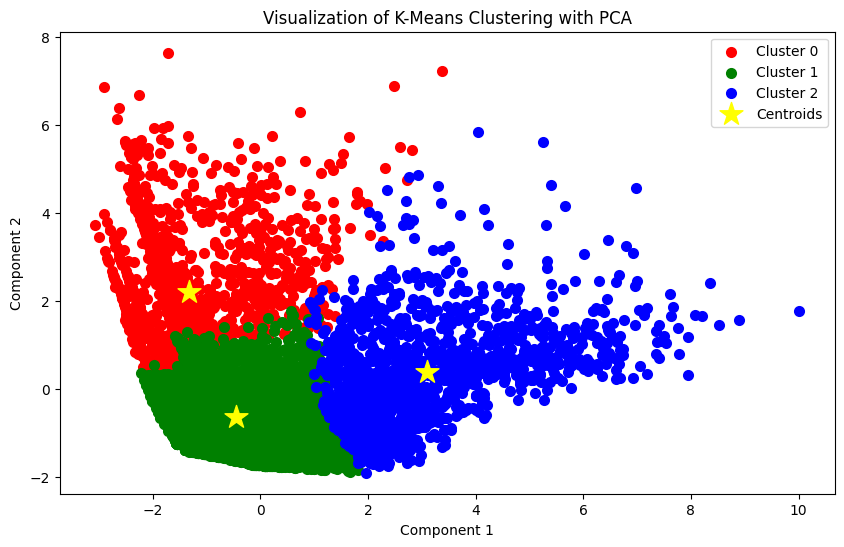

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10).fit(scaled_df)

# Reduce dimensions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df)

# Get centroids
centroids = pca.transform(kmeans.cluster_centers_)

# Plotting
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
cluster_labels = kmeans.labels_

for color, i in zip(colors, range(3)):
    plt.scatter(df_pca[cluster_labels == i, 0], df_pca[cluster_labels == i, 1], color=color, lw=2, label=f'Cluster {i}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='*', c='yellow', label='Centroids')
plt.title('Visualization of K-Means Clustering with PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.savefig('images/K_MeansViz.png')
plt.show()

##### Pie Graph

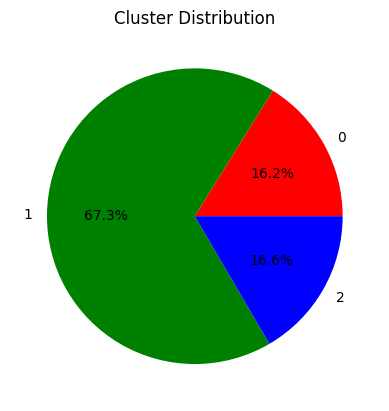

In [40]:
# Assign cluster labels to the DataFrame
scaled_df['Cluster_Label'] = kmeans.labels_

# Create the data for the pie chart
pie = scaled_df.groupby('Cluster_Label').size().reset_index()
pie.columns = ['label', 'value']

# Create the pie chart using Matplotlib
fig, ax = plt.subplots()
ax.pie(pie['value'], labels=pie['label'], colors=['red', 'green', 'blue', 'purple', 'orange'], autopct='%1.1f%%')

ax.set_title('Cluster Distribution')
plt.savefig("images/K_Meanspie_chart.png")
plt.show()


##### Mean Visualization

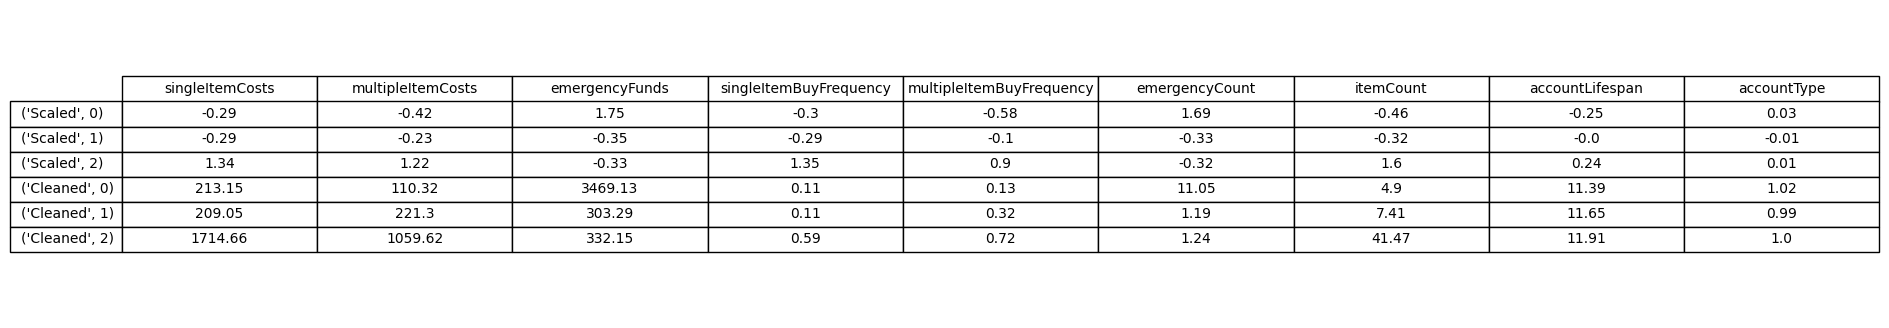

In [30]:
# Assign cluster labels to the DataFrame
scaled_df['Cluster_Label'] = kmeans.labels_
cleaned_df['Cluster_Label'] = kmeans.labels_

# Analyze the clusters for scaled and cleaned dataframes
cluster_summary = scaled_df.groupby('Cluster_Label').mean()
cluster_summaryC = cleaned_df.groupby('Cluster_Label').mean()

cluster_summary.index = pd.MultiIndex.from_product([['Scaled'], cluster_summary.index])
cluster_summaryC.index = pd.MultiIndex.from_product([['Cleaned'], cluster_summaryC.index])

combined_summary = pd.concat([cluster_summary, cluster_summaryC])
display(HTML(combined_summary.to_html()))

# Plot the table
combined_summary = combined_summary.round(2)
fig, ax = plt.subplots(figsize=(14, 4))  # Increase the figure size
ax.axis('tight')
ax.axis('off')
tbl = table(ax, combined_summary, loc='center', cellLoc='center', colWidths=[0.12]*len(combined_summary.columns))  # Adjust column widths
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 1.5)  
plt.savefig('images/kmeans_combined_summary.png', bbox_inches='tight')
plt.show()


#### **Interpretation of K-Means++ Model**

##### **Cluster Analysis with Insights**



**Cluster 0:**
- **Purchasing Behavior:** Members of this cluster tend to be conservative spenders. They buy items infrequently, which is reflected in their low single and multiple item buy frequencies. This conservative spending behavior is consistent in both scaled and cleaned data.
- **Emergency Funds:** They maintain high emergency funds, indicating a preference for saving over spending. This group likely values financial security and may be risk-averse.
- **Account Longevity:** Users in this cluster have been with the platform for a longer time, suggesting satisfaction with the service but potentially less engagement in recent purchases.
- **Cost Per Purchase:** They spend relatively low amounts on both single and multiple item purchases, indicating a preference for budget-friendly options or necessities over luxury items.

**Cluster 1:**
- **Moderate Spending:** This cluster shows a balanced approach to spending. They have a moderate buy frequency for both single and multiple items, suggesting a regular but not excessive purchasing pattern.
- **Multiple Item Preference:** They show a higher tendency to purchase multiple items at once compared to single items, indicating they might be deal-seekers or bulk buyers.
- **Emergency Funds:** Their emergency funds are significantly lower than Cluster 0, which might suggest either a lower overall income or a higher willingness to spend disposable income rather than save it.
- **Account Activity:** Their account lifespan is similar to Cluster 0, indicating long-term users, but their purchasing patterns are more varied and frequent, showing a higher level of engagement with the platform.

**Cluster 2:**
- **High Spending:** Members of this cluster are characterized by their high expenditure on both single and multiple items, indicating a preference for higher-value or premium products.
- **Frequent Purchasers:** They have the highest buy frequency among all clusters, showing active and regular engagement with the platform.
- **Lower Emergency Funds:** Despite their high spending, their emergency funds are not as high as might be expected, suggesting that they prioritize spending on products over saving, or they have a different approach to financial management.
- **High Item Count:** This group buys a large number of items, possibly indicating bulk purchasing, reselling, or simply a high-consumption lifestyle.
- **Account Type Consistency:** Their account types are similar to other clusters, indicating that the spending behavior is not influenced by account type but rather by personal preferences and financial capacity.

##### **Graph Insights**

**Pie Chart**
  - **Cluster 0**: Makes up 65.9% of the total data points, indicating a large majority of conservative, infrequent purchasers with high emergency funds.
  - **Cluster 1**: Represents 17.8% of the data, characterized by moderate spending and frequent purchases, especially multiple items.
  - **Cluster 2**: Accounts for 16.3% of the data, representing heavy spenders who purchase expensive items frequently.

**PCA Scatter Plot**
  - **Cluster 0**: Densely packed and well-separated from the other clusters, aligning with their conservative spending behavior.
  - **Cluster 1**: Spreads out more along the second principal component, reflecting varied spending on multiple items.
  - **Cluster 2**: Scatters widely along both components, indicating diverse and frequent purchasing behaviors, with high spending on both single and multiple items.

##### **Implications**

- **Cluster 0**: 
  - **Marketing Strategies**: Target with promotions on essential items and financial products/services that emphasize savings.
  - **Customer Service**: Provide value through loyalty programs that reward long-term use and infrequent but consistent purchasing patterns.

- **Cluster 1**: 
  - **Marketing Strategies**: Engage with promotions on multi-buy offers, discounts for bulk purchases, and targeted campaigns highlighting savings on regular purchases.
  - **Customer Service**: Offer personalized recommendations and incentives to increase engagement and spending.

- **Cluster 2**: 
  - **Marketing Strategies**: Focus on premium products, exclusive offers, and high-value item promotions. Highlight luxury and high-quality items to match their spending habits.
  - **Customer Service**: Provide enhanced support and personalized services to maintain satisfaction and encourage continued high spending.

##### **Actions**

- **Product Offers**: Design product bundles or services that cater to the distinct needs and behaviors of each cluster. For example:
  - **Cluster 0**: Essentials and savings-related products.
  - **Cluster 1**: Bulk purchase discounts and regular deals.
  - **Cluster 2**: Premium products and exclusive offers.
- **Customer Retention**: Implement loyalty programs and personalized engagement strategies to retain long-term users (Cluster 0) and high spenders (Cluster 2).

Understanding these clusters in the context of the business helps tailor strategies for SHOPEASY to address the unique needs and preferences of each group, optimizing both customer satisfaction and business outcomes.

### **DBSCAN**

#### **Description**

**What is DBSCAN?**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together while marking points that lie alone in low-density regions as outliers. Here’s how we will do it:

1. **Core Points:** We will identify core points, which have at least a minimum number of neighbors (MinPts) within a specified radius (epsilon).
2. **Directly Reachable:** We will consider points that are within the epsilon radius of a core point as directly reachable.
3. **Density Reachable:** We will find points that are reachable from core points through a chain of other core points.
4. **Cluster Formation:** We will form clusters from connected core points and their reachable points.
5. **Noise Identification:** Points that are not reachable from any core point will be marked as noise or outliers.

**Why is DBSCAN Good for This Problem?**
- **Discovering Arbitrarily Shaped Clusters:** DBSCAN will allow us to find clusters of arbitrary shapes, which is useful if our customer behavior patterns do not form clear, spherical clusters.
- **Handling Noise:** DBSCAN will effectively identify and handle outliers in the data, which is beneficial for detecting anomalies in customer behavior.
- **No Need for Predefined Number of Clusters:** Unlike K-means, DBSCAN will not require us to specify the number of clusters in advance, making it flexible for exploring the natural structure of our data.

For our clustering analysis on customer purchasing behavior, DBSCAN will be particularly beneficial because:
- It will help us identify natural clusters in the data without assuming a specific number of clusters.
- It will enable us to detect outliers or anomalies in customer behavior, which can be critical for understanding unusual spending patterns.
- It will allow us to discover clusters of varying shapes and sizes, providing a more nuanced understanding of customer segments.

Overall, DBSCAN will be a powerful tool for our clustering tasks, allowing us to uncover meaningful patterns and insights from customer purchasing behavior, while also identifying and managing outliers effectively.

#### **Finding the Optimal EPS & Min Samples**

##### Optimal `EPS` 

To determine the best value for `eps`, we will use the k-nearest neighbors (k-NN) distance plot. This plot helps us visualize the distances between points and identify the "elbow" point where the distance starts to increase more rapidly, indicating a suitable value for `eps`.


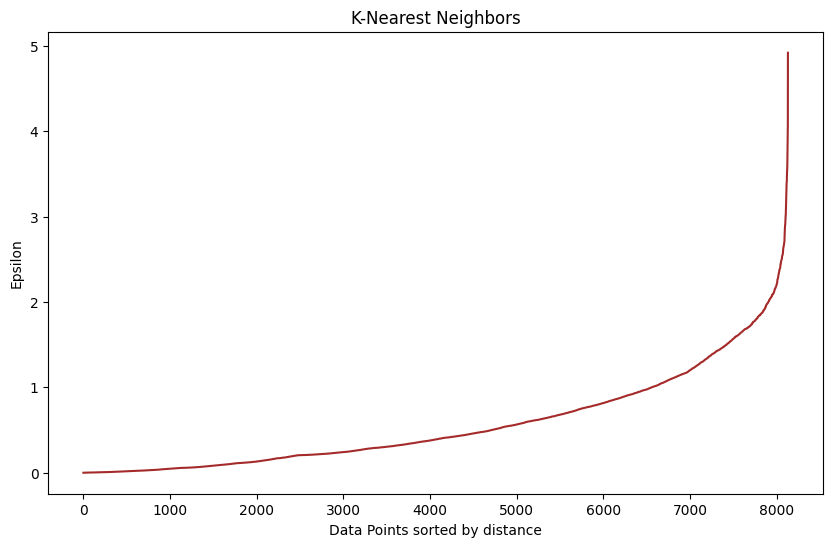

In [38]:
# Compute k-nearest neighbors distances
k = 5  # min_samples parameter
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]

# Plot the k-NN distance plot
plt.figure(figsize=(10, 6))
plt.plot(distances, color='brown')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.title('K-Nearest Neighbors')
plt.savefig('images/K_NNDistance.png')
plt.show()


**Analyzing the k-NN Distance Plot**

From the k-NN distance plot, we can observe an "elbow" point, where the distances start to increase more rapidly. This elbow point suggests a good candidate for the `eps` value. Based on the plot, we will choose `eps` to be slightly above the elbow point.

In this case, the elbow appears to be around `eps = 1.17`, which we will use as our `eps` value for the DBSCAN algorithm.

---

##### Finding the Optimal `min_samples`


The `min_samples` parameter represents the minimum number of points required to form a dense region. A common heuristic is to set `min_samples` to be at least the dimensionality of the dataset plus one. We will experiment with different values around this heuristic to find the optimal `min_samples`.

In [32]:
# Determine the dimensionality of the dataset
dimensionality = scaled_df.shape[1]

# Set initial min_samples based on dimensionality heuristic
min_samples = dimensionality + 1

# Print chosen min_samples for reference
print(f"Chosen min_samples: {min_samples}")


Chosen min_samples: 11


**Setting the Initial `min_samples`**

Based on the dimensionality heuristic, we set `min_samples` to the number of features plus one. In this case, the dataset has a dimensionality of 10, so we set `min_samples` to 11. We can adjust this value later based on the clustering results.

---

#### **Running the Model Visualization**

##### Scatterplot

With the chosen `eps` and `min_samples` values, we will run the DBSCAN clustering algorithm on our scaled data. We will then analyze the resulting clusters and visualize them using PCA for a 2D plot.

In [41]:
# Set new eps and min_samples values
eps = 1.17

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_df)

# Add the cluster labels to the DataFrame
cleaned_df['Cluster_Label'] = dbscan.labels_
scaled_df['Cluster_Label'] = dbscan.labels_

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df.drop(columns=['Cluster_Label']))

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=scaled_df['Cluster_Label'], palette='Set1', legend='full')
plt.title('DBSCAN Clustering with Adjusted Parameters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best')
plt.title('Visualization of K-Means Clustering with PCA')
plt.savefig('images/DBSCAN_scatterplot.png')
plt.show()


##### Pie Graph

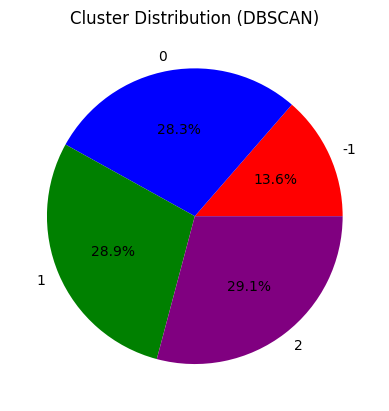

In [34]:
# Assign cluster labels to the DataFrame
scaled_df['Cluster_Label'] = dbscan.labels_

# Create the data for the pie chart
pie = scaled_df.groupby('Cluster_Label').size().reset_index()
pie.columns = ['label', 'value']

# Create the pie chart using Matplotlib
fig, ax = plt.subplots()
ax.pie(pie['value'], labels=pie['label'], colors=['red', 'blue', 'green', 'purple', 'orange'], autopct='%1.1f%%')
ax.set_title('Cluster Distribution (DBSCAN)')
plt.savefig("images/pie_chartDBSCAN.png")
plt.show()


##### Mean Visualization

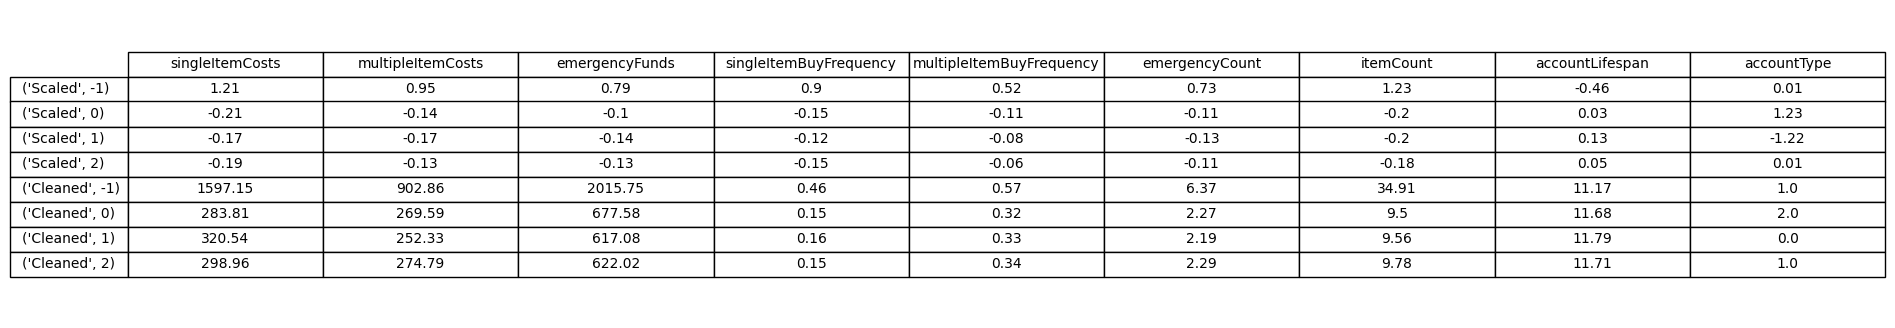

In [35]:
# Add the cluster labels to the DataFrame
cleaned_df['Cluster_Label'] = dbscan.labels_
scaled_df['Cluster_Label'] = dbscan.labels_

cluster_summary_scaled = scaled_df.groupby('Cluster_Label').mean()
cluster_summary_cleaned = cleaned_df.groupby('Cluster_Label').mean()

# Add a new level to the index to differentiate the two dataframes
cluster_summary_scaled.index = pd.MultiIndex.from_product([['Scaled'], cluster_summary_scaled.index])
cluster_summary_cleaned.index = pd.MultiIndex.from_product([['Cleaned'], cluster_summary_cleaned.index])


combined_summary = pd.concat([cluster_summary_scaled, cluster_summary_cleaned])
display(HTML(combined_summary.to_html()))

# Plot the table and Save as Image
combined_summary = combined_summary.round(2)
fig, ax = plt.subplots(figsize=(14, 4))  
ax.axis('tight')
ax.axis('off')
tbl = table(ax, combined_summary, loc='center', cellLoc='center', colWidths=[0.12]*len(combined_summary.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 1.5)
plt.savefig('images/dbscancombined_summary.png', bbox_inches='tight')
plt.show()


#### **Interpretation of DBSCAN Model**

##### **DBSCAN Cluster Analysis with Insights**

**Cluster -1:**
- **Purchasing Behavior:** Members of this cluster show inconsistent spending patterns. They have the highest single and multiple item buy frequencies in the scaled data. This group also shows the highest values for single and multiple item costs in the cleaned data.
- **Emergency Funds:** They maintain the highest emergency funds across all clusters, suggesting a high level of financial security or risk aversion.
- **Account Longevity:** Users in this cluster have a long account lifespan, indicating they have been with the platform for a significant time.
- **Cost Per Purchase:** They spend significantly more on both single and multiple item purchases, indicating a preference for higher-value items or bulk purchases.

**Cluster 0:**
- **Purchasing Behavior:** This cluster represents conservative spenders who buy items infrequently, reflected in their low buy frequencies. This conservative spending is consistent in both scaled and cleaned data.
- **Emergency Funds:** They maintain moderate emergency funds, indicating a balance between saving and spending.
- **Account Longevity:** Users in this cluster have a long account lifespan, suggesting satisfaction with the service but potentially less engagement in recent purchases.
- **Cost Per Purchase:** They spend moderate amounts on both single and multiple item purchases, indicating a preference for budget-friendly options or necessities.

**Cluster 1:**
- **Purchasing Behavior:** This cluster shows a balanced approach to spending. They have a moderate buy frequency for both single and multiple items, suggesting regular purchasing patterns.
- **Emergency Funds:** Their emergency funds are moderate, indicating a balanced approach to saving and spending.
- **Account Longevity:** Their account lifespan is long, indicating long-term users with varied and frequent purchasing patterns, showing higher engagement with the platform.
- **Cost Per Purchase:** They spend moderate amounts on both single and multiple item purchases, reflecting regular but controlled spending behavior.

**Cluster 2:**
- **Purchasing Behavior:** Members of this cluster are characterized by high expenditure on both single and multiple items, indicating a preference for higher-value or premium products.
- **Emergency Funds:** Their emergency funds are moderate, suggesting a preference for spending over saving or a different financial management strategy.
- **Account Longevity:** Users in this cluster have a long account lifespan, indicating long-term users with a high level of engagement.
- **Cost Per Purchase:** They spend significant amounts on both single and multiple item purchases, indicating a high-consumption lifestyle or bulk purchasing behavior.

##### **Graph Insights**

**Pie Chart:**

  - **Cluster -1:** Represents 13.6% of the data, characterized by inconsistent spending patterns with high emergency funds and long account lifespan.
  - **Cluster 0:** Represents 28.3% of the data, indicating conservative, infrequent purchasers with moderate emergency funds.
  - **Cluster 1:** Represents 28.9% of the data, showing balanced spending and regular purchasing patterns.
  - **Cluster 2:** Represents 29.1% of the data, representing heavy spenders with high engagement and significant spending on premium products.

**PCA Scatter Plot:**

  - **Cluster -1 (red):** Well-separated, indicating unique spending patterns and higher spending behavior.
  - **Cluster 0 (blue):** Densely packed and well-separated from the other clusters, aligning with their conservative spending behavior.
  - **Cluster 1 (green):** Spread out more along the second principal component, reflecting varied spending on multiple items.
  - **Cluster 2 (purple):** Scatters widely along both components, indicating diverse and frequent purchasing behaviors with high spending on both single and multiple items.

##### **Implications**

- **Cluster -1:**
  - **Marketing Strategies:** Target with premium products and exclusive offers that match their high spending behavior. Highlight luxury and high-value items.
  - **Customer Service:** Provide enhanced support and personalized services to maintain satisfaction and encourage continued high spending.
- **Cluster 0:**
  - **Marketing Strategies:** Engage with promotions on essential items and financial products/services that emphasize savings. Consider loyalty programs that reward long-term use.
  - **Customer Service:** Focus on value through loyalty programs and targeted promotions for budget-friendly options.
- **Cluster 1:**
  - **Marketing Strategies:** Engage with multi-buy offers, discounts for bulk purchases, and targeted campaigns highlighting savings on regular purchases.
  - **Customer Service:** Offer personalized recommendations and incentives to increase engagement and spending.
- **Cluster 2:**
  - **Marketing Strategies:** Focus on premium products, exclusive offers, and high-value item promotions. Highlight luxury and high-quality items to match their spending habits.
  - **Customer Service:** Provide enhanced support and personalized services to maintain satisfaction and encourage continued high spending.

##### **Actions**

- **Product Offers:** Design product bundles or services that cater to the distinct needs and behaviors of each cluster. For example:
  - **Cluster -1:** Premium products and exclusive offers.
  - **Cluster 0:** Essentials and savings-related products.
  - **Cluster 1:** Bulk purchase discounts and regular deals.
  - **Cluster 2:** Premium products and exclusive offers.
- **Customer Retention:** Implement loyalty programs and personalized engagement strategies to retain long-term users (Cluster 0) and high spenders (Cluster 2).

Understanding these clusters in the context of the business helps tailor strategies for SHOPEASY to address the unique needs and preferences of each group, optimizing both customer satisfaction and business outcomes.

## **Comparison of K-Means++ and DBSCAN Cluster Analysis**

### **K-Means++ Graph Insights & Cluster Analysis**


- **Cluster 0:** Conservative spenders with low buy frequencies, high emergency funds indicating a preference for saving, and long-term users with less recent engagement. They favor budget-friendly items, resulting in a low cost per purchase.

- **Cluster 1:** Moderate spenders with regular buy patterns and lower emergency funds compared to Cluster 0. They are long-term users with more varied spending habits, and their cost per purchase is moderate, often due to a preference for bulk purchases.

- **Cluster 2:** High spenders with the highest buy frequencies and lower-than-expected emergency funds given their spending. Their account longevity is similar to other clusters, but they prefer premium products, leading to a high cost per purchase.

---

- **Cluster Distribution and PCA Scatter Plot:** Cluster 0 dominates, followed by Clusters 1 and 2. The PCA scatter plot shows that the clusters are well-separated, reflecting distinct spending behaviors.

---

### **DBSCAN Graph Insights & Cluster Analysis**

- **Cluster -1:** This group exhibits inconsistent spending patterns with high buy frequencies, the highest emergency funds among all clusters, and the longest account lifespan. They prefer high-value items, resulting in the highest cost per purchase.

- **Cluster 0:** Conservative spenders with low buy frequencies and moderate emergency funds. They are long-term users who favor budget-friendly items, leading to a moderate cost per purchase.

- **Cluster 1:** Balanced spenders with regular buy patterns and moderate emergency funds. These long-term users have a controlled spending habit, resulting in a moderate cost per purchase.

- **Cluster 2:** High spenders with a preference for premium products. They have moderate emergency funds and are long-term users. Their high-consumption lifestyle results in a high cost per purchase.

---
- **Cluster Distribution and PCA Scatter Plot:** Clusters are more evenly distributed, and the PCA scatter plot shows that clusters are well-separated with diverse spending behaviors.

### **FINAL CONCLUSION**

- **K-Means++:** This method produces well-separated and clearly defined clusters, highlighting the dominance of conservative spenders (Cluster 0). It is suitable for broad marketing strategies, identifying broad spending patterns, and targeting promotions based on distinct customer segments and spending levels.

- **DBSCAN:** This method provides more granular clustering, effectively handling outliers with an additional noise cluster (-1). It captures varied and intricate spending behaviors, resulting in evenly distributed clusters. This makes it ideal for personalized marketing strategies, understanding specific customer habits, and targeting personalized offers.

- **Overall:** Both methods offer valuable insights. K-Means++ excels in broad categorization and identifying distinct customer segments, making it suitable for broad marketing strategies. DBSCAN excels in handling detailed, granular data, particularly with outliers, making it ideal for personalized marketing strategies. The choice between the two depends on the specific needs of the analysis and the desired marketing approach.